In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import wb
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

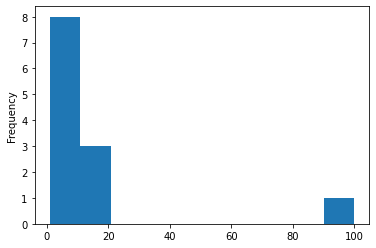

In [2]:
df_hist = pd.Series([1, 1, 1, 1, 2, 2, 2, 5, 11, 11, 11, 100])
df_hist.plot(
    kind='hist',
)

In [3]:
wb_countries = wb.get_countries()
df = wb.download(indicator="SP.DYN.LE00.IN", country=wb_countries['iso2c'], start=1980, end=2019)
df.reset_index(inplace=True)
df.rename(columns={'SP.DYN.LE00.IN':'lifespan'}, inplace=True)
df = df.pivot(index='country', columns='year', values='lifespan')
df.dropna(how='all', axis=1, inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='any', axis=0, inplace=True)
df.head()

/home/tatyana/.local/lib/python3.6/site-packages/pandas_datareader/wb.py:593: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,...,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000
Africa Eastern and Southern,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,...,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213
Africa Western and Central,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,...,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723
Albania,70.208000,70.416000,70.635000,70.876000,71.134000,71.388000,71.605000,71.760000,71.843000,71.860000,...,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,78.573000
Algeria,58.198000,59.519000,60.813000,62.029000,63.130000,64.087000,64.884000,65.545000,66.097000,66.554000,...,74.938000,75.199000,75.436000,75.661000,75.878000,76.090000,76.298000,76.499000,76.693000,76.880000


In [4]:
countries = [df.index[8], df.index[150], df.index[0]]
countries

['Argentina', 'Moldova', 'Afghanistan']

Text(0, 0.5, '')

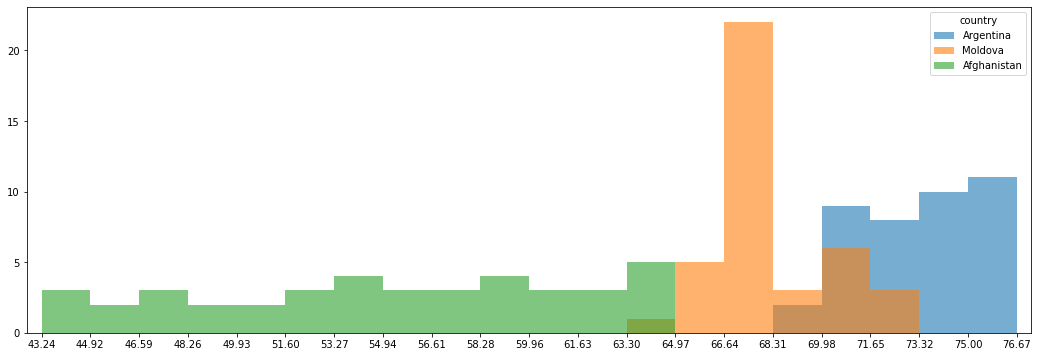

In [5]:
bins = 20
_, bin_edges = np.histogram(df.loc[countries], bins)

df.loc[countries].T.plot(
    kind='hist',
    figsize=(18, 6),
    alpha=0.6,
    xticks=bin_edges,
    bins=bins,
    xlim=(bin_edges[0]-0.5, bin_edges[-1]+0.5)
#     stacked=True
)

plt.ylabel('')

In [6]:
df_w_h = pd.read_csv('weight-height.csv')
df_w_h.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:ylabel='Frequency'>

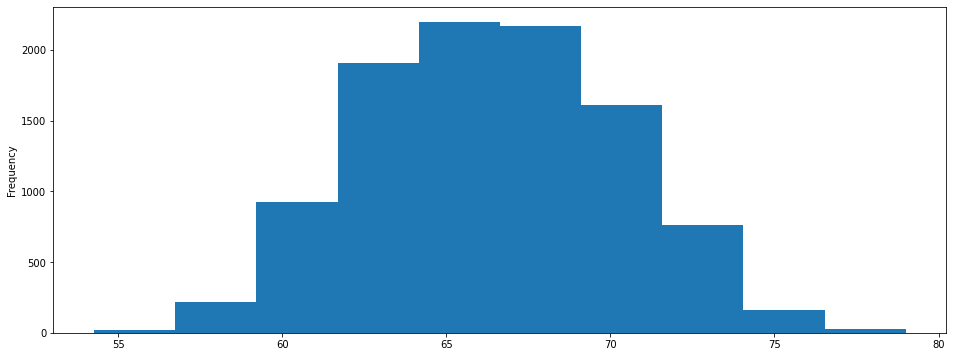

In [7]:
df_w_h['Height'].plot(
    kind='hist',
    figsize=(16, 6)
)

<AxesSubplot:ylabel='Frequency'>

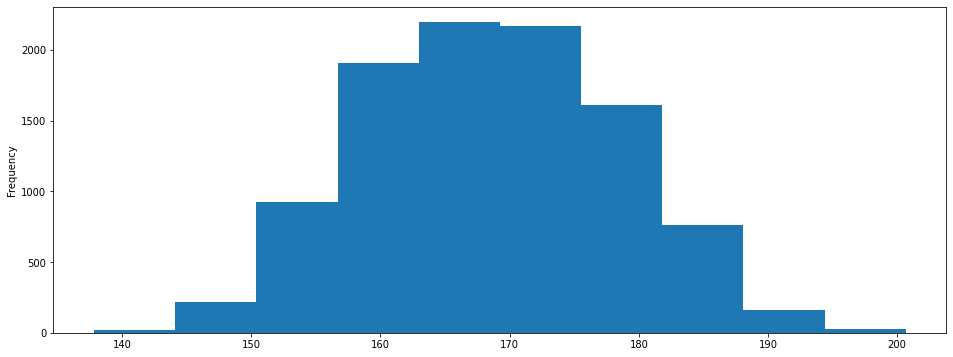

In [8]:
df_w_h['Height'] = df_w_h['Height'] * 2.54
df_w_h['Height'].plot(
    kind='hist',
    figsize=(16, 6)
)

In [18]:
df_heights = pd.DataFrame({'HM' : df_w_h[df_w_h['Gender'] == 'Male']['Height'].values, 'HF' : df_w_h[df_w_h['Gender'] == 'Female']['Height']})
df_heights.head()

,HM,HF
5000,187.571423,149.633259
5001,174.706036,165.684232
5002,188.239668,160.957270
5003,182.196685,163.779193
5004,177.499761,156.954464


<AxesSubplot:ylabel='Frequency'>

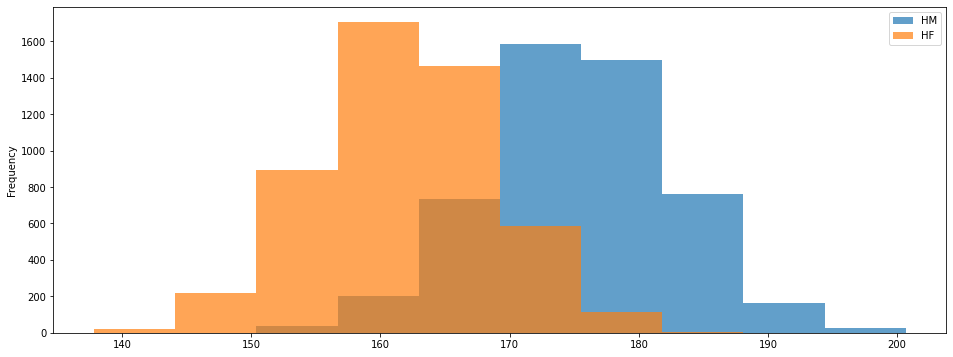

In [20]:
df_heights.plot(
    kind='hist',
    figsize=(16, 6),
    alpha=0.7
)

<AxesSubplot:xlabel='year'>

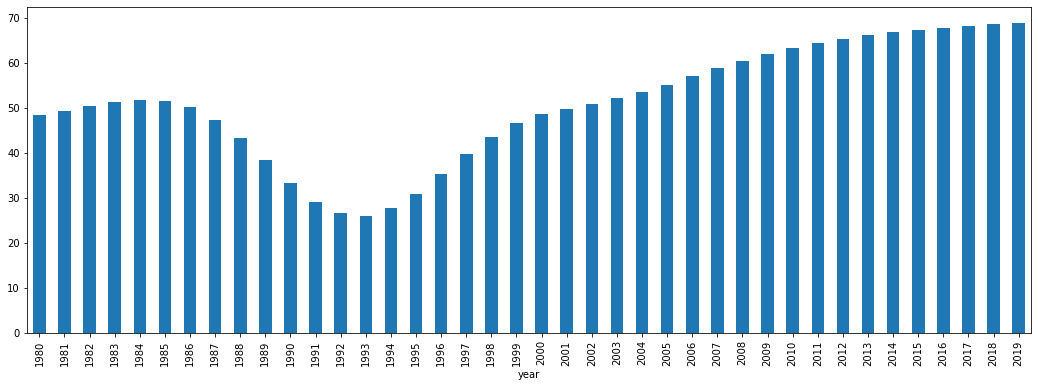

In [21]:
df.loc['Rwanda'].plot(
    kind='bar',
    figsize=(18,6)
)

In [22]:
df_comp_names = pd.read_csv('sp500companies.csv', index_col=0)
df_comp_names.head()

,Name,Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care


In [23]:
df_comp_descr = pd.read_csv('snp500_companies_description.csv', index_col=0)
df_comp_descr.head()

,Major index membership,Market capitalization,Income (ttm),Revenue (ttm),Book value per share (mrq),Cash per share (mrq),Dividend (annual),Dividend yield (annual),Full time employees,Stock has options trading on a market exchange,...,Performance (Quarter),Performance (Half Year),Performance (Year),Performance (Year To Date),Beta,Average True Range (14),"Volatility (Week, Month)",Previous close,Current stock price,Performance (today)
Company,,,,,,,,,,,,,,,,,,,,,
A,S&P 500,39.84B,1.26B,6.53B,17.13,3.97,0.84,0.64%,17400,Yes,...,11.41%,-1.80%,-13.44%,-17.88%,1.05,3.65,2.78% 2.80%,127.71,131.11,2.66%
AAL,S&P 500,9.20B,-1922.00M,40.72B,-12.95,18.73,-,-,123400,Yes,...,-27.46%,-15.27%,-36.38%,-23.39%,1.56,0.75,4.29% 5.01%,13.97,13.76,-1.50%
AAP,S&P 500,11.50B,570.00M,11.04B,47.50,2.30,6.00,3.14%,41000,Yes,...,-15.05%,-15.14%,-10.00%,-20.36%,1.23,5.43,2.77% 2.70%,185.91,191.03,2.75%
AAPL,DJIA S&P500,2567.56B,101.94B,386.02B,4.14,3.16,0.92,0.58%,154000,Yes,...,0.50%,-1.47%,8.53%,-11.39%,1.21,3.78,2.14% 2.53%,156.79,157.35,0.36%
ABBV,S&P 500,263.34B,12.40B,56.73B,9.19,4.31,5.64,3.77%,50000,Yes,...,-4.99%,11.56%,26.32%,10.60%,0.72,3.31,2.12% 1.99%,151.15,149.75,-0.93%


In [25]:
df_comp_descr_short = df_comp_descr[df_comp_descr['Dividend (annual)'] != '-'][['Market capitalization', 'Dividend (annual)']]
df_comp_descr_short.head()

,Market capitalization,Dividend (annual)
Company,,
A,39.84B,0.84
AAP,11.50B,6.00
AAPL,2567.56B,0.92
ABBV,263.34B,5.64
ABC,30.41B,1.84


In [26]:
df_comp_descr_short.rename(columns={'Market capitalization' : 'Market capitalization (B)'}, inplace=True)
df_comp_descr_short.head()

,Market capitalization (B),Dividend (annual)
Company,,
A,39.84B,0.84
AAP,11.50B,6.00
AAPL,2567.56B,0.92
ABBV,263.34B,5.64
ABC,30.41B,1.84


In [29]:
df_comp_descr_short['Market capitalization (B)'] = df_comp_descr_short['Market capitalization (B)'].str.replace('B', '', regex=True).astype(float)
df_comp_descr_short.head()

,Market capitalization (B),Dividend (annual)
Company,,
A,39.84,0.84
AAP,11.50,6.00
AAPL,2567.56,0.92
ABBV,263.34,5.64
ABC,30.41,1.84


In [30]:
df_comp_descr_short['Dividend (annual)'] = df_comp_descr_short['Dividend (annual)'].astype(float)

In [31]:
df_snp500 = pd.concat([df_comp_names, df_comp_descr_short], axis=1)
df_snp500.head()

,Name,Sector,Market capitalization (B),Dividend (annual)
MMM,3M,Industrials,79.78,5.96
AOS,A. O. Smith,Industrials,9.51,1.12
ABT,Abbott Laboratories,Health Care,195.87,1.88
ABBV,AbbVie,Health Care,263.34,5.64
ABMD,Abiomed,Health Care,NaN,NaN


In [33]:
df_snp500.dropna(how='any', inplace=True)
df_snp500.head()

,Name,Sector,Market capitalization (B),Dividend (annual)
MMM,3M,Industrials,79.78,5.96
AOS,A. O. Smith,Industrials,9.51,1.12
ABT,Abbott Laboratories,Health Care,195.87,1.88
ABBV,AbbVie,Health Care,263.34,5.64
ACN,Accenture,Information Technology,192.09,3.88


In [34]:
df_snp500 = df_snp500[df_snp500['Market capitalization (B)'] > 300]
df_snp500

,Name,Sector,Market capitalization (B),Dividend (annual)
AAPL,Apple,Information Technology,2567.56,0.92
LLY,Eli Lilly & Co,Health Care,312.56,3.92
XOM,ExxonMobil,Energy,393.31,3.52
HD,Home Depot,Consumer Discretionary,306.35,7.60
JNJ,Johnson & Johnson,Health Care,456.23,4.52
JPM,JPMorgan Chase,Financials,338.85,4.00
MA,Mastercard,Information Technology,345.84,1.96
MSFT,Microsoft,Information Technology,2102.85,2.48
NVDA,Nvidia,Information Technology,468.58,0.16
PG,Procter & Gamble,Consumer Staples,349.65,3.65


Text(3.5, 8.6, '306.35')

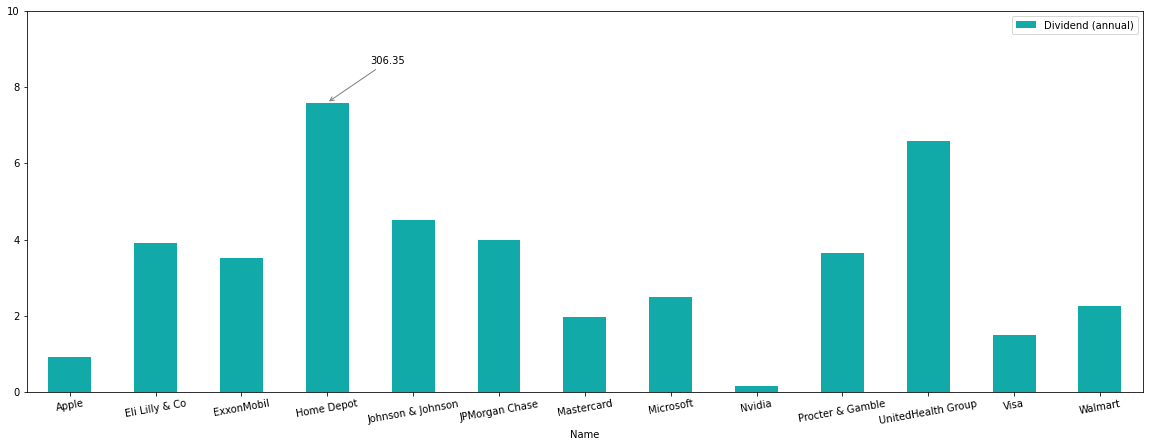

In [40]:
df_snp500.plot(
    kind='bar', 
    figsize=(20, 7),
    x='Name',
    y='Dividend (annual)', 
    rot=10,
    color='#12AAA8',
    ylim=(0, 10)
)

index = 3
div = df_snp500.iloc[index]['Dividend (annual)']

plt.annotate(
    df_snp500.iloc[index]['Market capitalization (B)'],
    (index, div),
    xytext=(index+0.5, div+1),
    arrowprops=dict(arrowstyle='->', color='grey', lw=1)

)


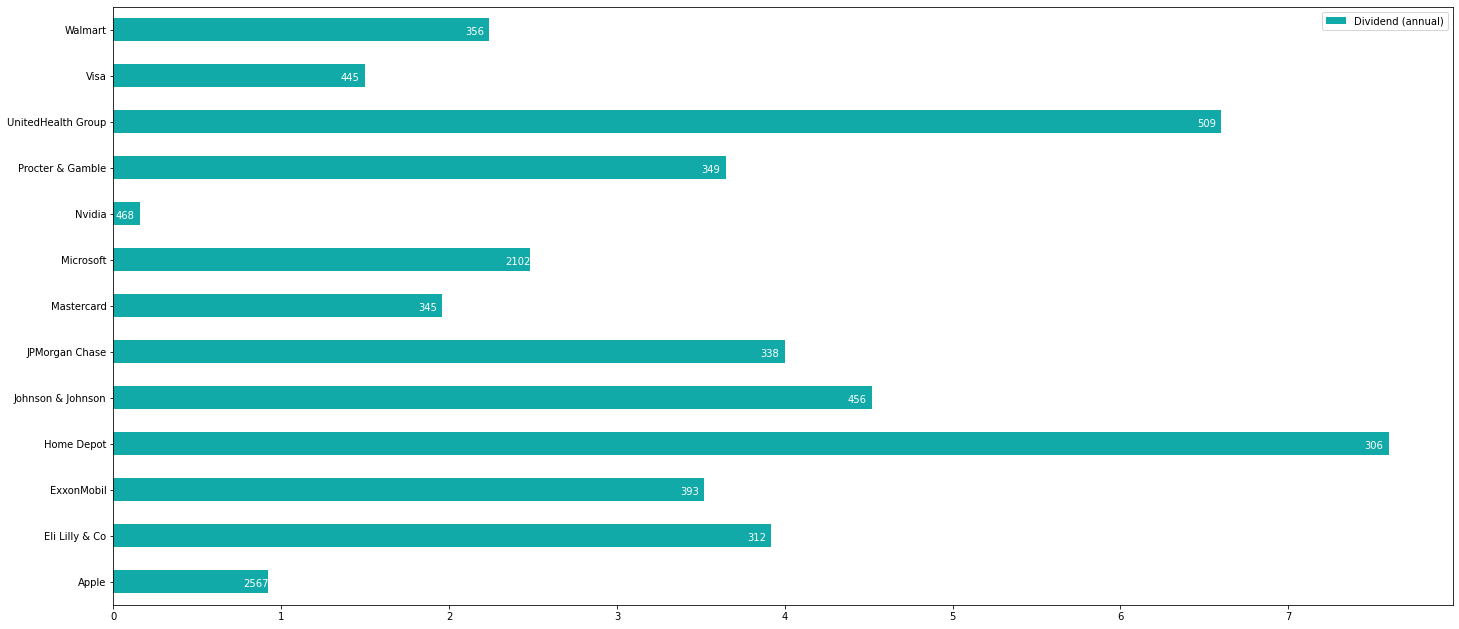

In [50]:
df_snp500.plot(
    kind='barh', 
    figsize=(24, 11),
    x='Name',
    y='Dividend (annual)', 
    color='#12AAA8',
)
plt.ylabel('')

for index, value in enumerate(df_snp500['Dividend (annual)']):
    label = int(df_snp500.iloc[index]['Market capitalization (B)'])
    plt.annotate(
        label,
        (value-0.145, index-0.1), 
        color='white'
    )
    

In [53]:
df_countries = df.loc[countries, df.columns[30:]]
df_countries

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,
Argentina,75.278,75.439,75.598,75.756,75.913,76.068,76.221,76.372,76.520,76.667
Moldova,69.616,70.119,70.581,70.968,71.267,71.478,71.617,71.717,71.808,71.901
Afghanistan,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,64.833


<AxesSubplot:ylabel='year'>

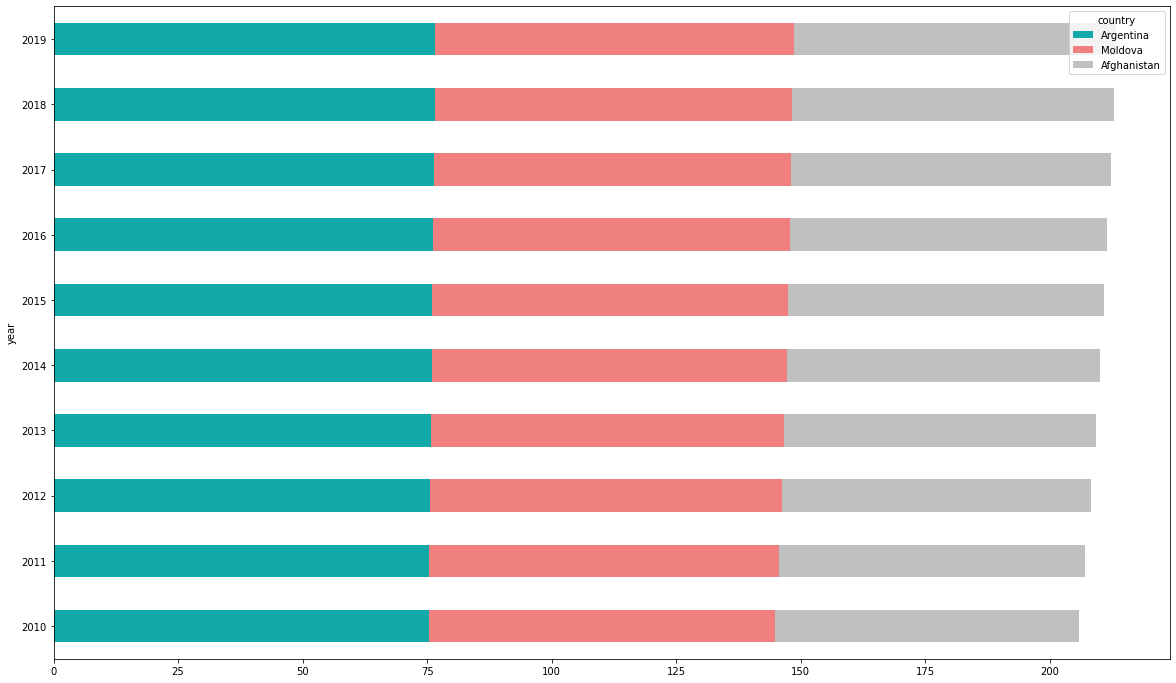

In [58]:
df_countries.T.plot(
    kind='barh', 
    figsize=(20, 12),
    color=['#12AAA8', 'lightcoral', 'silver'],
    stacked=True
)